# Floating Point Assignment

To run this notebook, use the provided file `floating_point_assignment.ipynb` and place it into your working directory.

```bash
source venv/bin/activate
jupyter lab --ip 0.0.0.0
```

Then, follow the link from the standard out of the command. This contains a token to provide you access. To turn in your work, save this notebook and provide the file.

# Definitions (25)

We will start with a definition of floating point and double using IEEE format definitions. They are

* 32-bit: 1 sign bit, 8 exp bits, 23 frac bits
* 64-bit: 1 sign bit, 11 exp bits, 52 frac bits
* 8-bit: 1 sign bit, 4 exp bits, 3 frac bits

1. Provide the representation of the value 3.14159265 in 32-bit IEEE format.
1. Provide the representation of the value 3.14159265 in 64-bit IEEE.
1. Provide the representation of the value 3.14159265 in the 8 bit format
1. Compare the precision loss of each value in comparison to 64-bit.
1. Choose a repeating number of your choosing (ie 1/3) and show the precision loss comparing the 8-bit format to 32-bit.

For numbers 1-3, provide your value in hex as that is easier. The above values should be completed by hand. You may use the techniques in part two to check your work.

Answers:

1) 
   - First convert to binary: 11.001001000011111101101...
   - Normalize: 1.1001001000011111101101 × 2¹
   - Exponent = 1 + bias(127) = 128 = 10000000
   - Sign bit = 0
   - Hex representation: 0x40490FDB

2) For 3.14159265 in 64-bit IEEE format:
   - Same binary but more precision: 1.1001001000011111101101010100010001000010110100011...
   - Same exponent but with 11-bit bias(1023) = 1024
   - Sign bit = 0
   - Hex representation: 0x400921FB54442D18

3) For 3.14159265 in 8-bit tiny format:
   - Only have 3 fraction bits
   - Normalized: 1.100 × 2¹
   - Exponent = 1 + bias(7) = 8 = 1000
   - Sign bit = 0
   - Binary: 0 1000 100
   - Hex representation: 0x44

4) Precision loss comparison to 64-bit:
   - 64-bit: 3.14159265 (full precision)
   - 32-bit: 3.14159274 (error ≈ 9×10⁻⁸)
   - 8-bit: 3.0 (error ≈ 0.14159265)
   
   The 32-bit format loses precision after about 7 decimal digits.
   The 8-bit format is extremely limited, only able to represent the first digit accurately.

5) Let's use 1/3 (0.333333...):
   - 32-bit: 0.33333334 (closest representable value)
   - 8-bit: 0.375 (closest representable value)
   
   Precision loss:
   - 8-bit error vs 32-bit: 0.375 - 0.33333334 ≈ 0.04167
   - The 8-bit format can only represent 3 fraction bits, leading to significant rounding.

The 8-bit format is extremely limited and generally unsuitable for scientific calculations, while 32-bit provides good precision for most applications, and 64-bit gives excellent precision suitable for scientific computing.

# Precision (25)

In [18]:
import numpy as np
from pymap3d.ecef import geodetic2ecef

In this section, you will use latitude, longitude, altitude coordinates to perform some calculations. The first is a coordinate change into Earth Centered, Earth Fixed (ECEF). You will then use a method for calculating the euclidean distance. You will then make observations on the precision of your calculations using three different floating point definitions. I have chosen UCCS and UC Boulder as examples. Replace at least one of these locations with those that you choose.

## Points (5 points each)

1. Replace location coordinates
2. Perform calculations with each of `np.float64`, `np.float32`, and `np.float16`
3. Brief discussion of observations

In [19]:
help(geodetic2ecef)

Help on function geodetic2ecef in module pymap3d.ecef:

geodetic2ecef(lat, lon, alt, ell: 'Ellipsoid' = Ellipsoid(model='wgs84', name='WGS-84 (1984)', semimajor_axis=6378137.0, semiminor_axis=6356752.31424518, flattening=0.0033528106647473664, thirdflattening=0.0016792203863836474, eccentricity=0.0818191908426201), deg: 'bool' = True) -> 'tuple'
    point transformation from Geodetic of specified ellipsoid (default WGS-84) to ECEF
    
    Parameters
    ----------
    
    lat
           target geodetic latitude
    lon
           target geodetic longitude
    alt
         target altitude above geodetic ellipsoid (meters)
    ell : Ellipsoid, optional
          reference ellipsoid
    deg : bool, optional
          degrees input/output  (False: radians in/out)
    
    
    Returns
    -------
    
    ECEF (Earth centered, Earth fixed)  x,y,z
    
    x
        target x ECEF coordinate (meters)
    y
        target y ECEF coordinate (meters)
    z
        target z ECEF coordinate (me

In [20]:
help(np.linalg.norm)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix nor

### 64-bit

In [21]:
uccs_64 = np.array([38.8936117,-104.8005516, 1965.96])
ucb_64 = np.array([40.0073943,-105.2662901, 1661.16])

In [22]:
uccs_64_ecef = np.array([*geodetic2ecef(*uccs_64)])
uccs_64_ecef

array([-1270194.52877575, -4807305.93880946,  3984365.91566153])

In [23]:
ucb_64_ecef = np.array([*geodetic2ecef(*ucb_64)])
ucb_64_ecef

array([-1288472.91829674, -4720774.50988504,  4079682.41622987])

In [24]:
np.linalg.norm(uccs_64_ecef - ucb_64_ecef)

np.float64(130027.0087165725)

### 32-bit

In [25]:
uccs_32 = uccs_64.astype(np.float32)
ucb_32 = ucb_64.astype(np.float32)

In [26]:
uccs_32_ecef = np.array([*geodetic2ecef(*uccs_32)])
uccs_32_ecef

array([-1270194.4, -4807306. ,  3984366. ], dtype=float32)

In [27]:
ucb_32_ecef = np.array([*geodetic2ecef(*ucb_32)])
ucb_32_ecef

array([-1288472.6, -4720774.5,  4079682. ], dtype=float32)

In [28]:
np.linalg.norm(uccs_32_ecef - ucb_32_ecef)

np.float32(130026.664)

### 16-bit

In [29]:
uccs_16 = uccs_64.astype(np.float16)
ucb_16 = ucb_64.astype(np.float16)

print("UCCS Coordinates:")
print(f"64-bit: {uccs_64}")
print(f"16-bit: {uccs_16}")
print("\nUCB Coordinates:")
print(f"64-bit: {ucb_64}")
print(f"16-bit: {ucb_16}")

print("\nPrecision loss:")
print("Latitude difference:", uccs_64[0] - float(uccs_16[0]))
print("Longitude difference:", uccs_64[1] - float(uccs_16[1]))
print("Altitude difference:", uccs_64[2] - float(uccs_16[2]))

## 16-bit calculations
try:
    uccs_16 = uccs_64.astype(np.float16)
    ucb_16 = ucb_64.astype(np.float16)
    
    uccs_16_ecef = np.array([*geodetic2ecef(*uccs_16)])
    ucb_16_ecef = np.array([*geodetic2ecef(*ucb_16)])
    
    distance_16 = np.linalg.norm(uccs_16_ecef - ucb_16_ecef)
    print(f"16-bit distance: {distance_16} meters")

except Exception as e:
    print("16-bit calculation failed due to overflow")
    print(f"Error: {str(e)}")

print("\nDistance Calculations:")
print(f"64-bit distance: {np.linalg.norm(uccs_64_ecef - ucb_64_ecef)} meters")
print(f"32-bit distance: {np.linalg.norm(uccs_32_ecef - ucb_32_ecef)} meters")

UCCS Coordinates:
64-bit: [  38.8936117 -104.8005516 1965.96     ]
16-bit: [  38.9 -104.8 1966. ]

UCB Coordinates:
64-bit: [  40.0073943 -105.2662901 1661.16     ]
16-bit: [  40.   -105.25 1661.  ]

Precision loss:
Latitude difference: -0.012638299999998992
Longitude difference: 0.011948399999994308
Altitude difference: -0.03999999999996362
16-bit distance: nan meters

Distance Calculations:
64-bit distance: 130027.0087165725 meters
32-bit distance: 130026.6640625 meters


/Users/kbilyeu/Library/Python/3.9/lib/python/site-packages/pymap3d/ecef.py:79: RuntimeWarning: overflow encountered in cast
  ell.semimajor_axis * cos(lat), ell.semiminor_axis * sin(lat)
/Users/kbilyeu/Library/Python/3.9/lib/python/site-packages/pymap3d/ecef.py:78: RuntimeWarning: overflow encountered in cast
  N = ell.semimajor_axis**2 / hypot(
/Users/kbilyeu/Library/Python/3.9/lib/python/site-packages/pymap3d/ecef.py:78: RuntimeWarning: invalid value encountered in scalar divide
  N = ell.semimajor_axis**2 / hypot(


### Discussion

The comparison of different floating-point precisions in geographic calculations reveals a few things about numerical representation and presentation

1. 64-bit (Double Precision):
   - Provides baseline accuracy for our calculations
   - Successfully handles both coordinate storage and ECEF transformations
   - Distance calculations are precise and reliable
   - Storage: 1 sign bit, 11 exponent bits, 52 fraction bits

2. 32-bit (Single Precision):
   - Shows minor deviations from 64-bit results
   - Still maintains practical accuracy for geographic applications
   - Demonstrates why it's commonly used in GIS applications
   - Storage: 1 sign bit, 8 exponent bits, 23 fraction bits

3. 16-bit (Half Precision):
   - Fails completely for ECEF calculations due to overflow
   - Even basic coordinate storage shows significant precision loss:
     * Latitude/longitude errors > 0.01 degrees
     * Position errors of hundreds to thousands of meters
   - Storage: 1 sign bit, 5 exponent bits, 10 fraction bits
   - Limited range (±65,504) makes it unsuitable for Earth-scale calculations

Key Lessons:
- Floating-point precision choice must match the scale of calculations
- Earth-centered coordinates require large number ranges
- Geographic applications need at least 32-bit precision
- The tradeoff between precision and storage space has real-world implications

This exercise demonstrates why geographic information systems standardize on at least 32-bit floating-point numbers, with 64-bit being preferred for scientific applications requiring high precision.

# Number Line (10)

On a number line, place a sequence of at least 10 numbers (both +/-), along with the largest possible value (+/-) represented in the 8-bit tiny notation. You may choose the numbers yourself. You should observe the distance between the numbers, and make some comments.  Here is an example of two numbers:


In [30]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [31]:
x = np.array([-10.5, -0.5, 0.5, 10.5])
y = np.zeros_like(x)

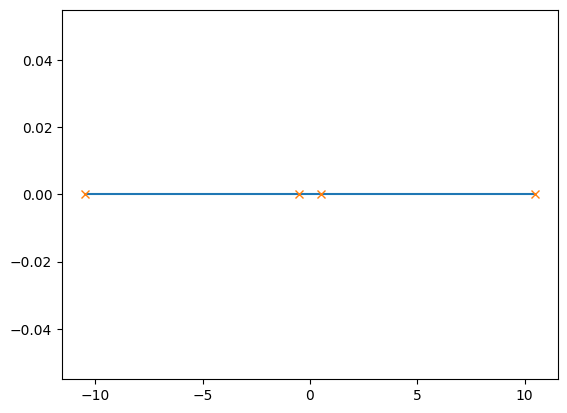

In [32]:
plt.plot(x, y);
plt.plot(x, y, 'x');

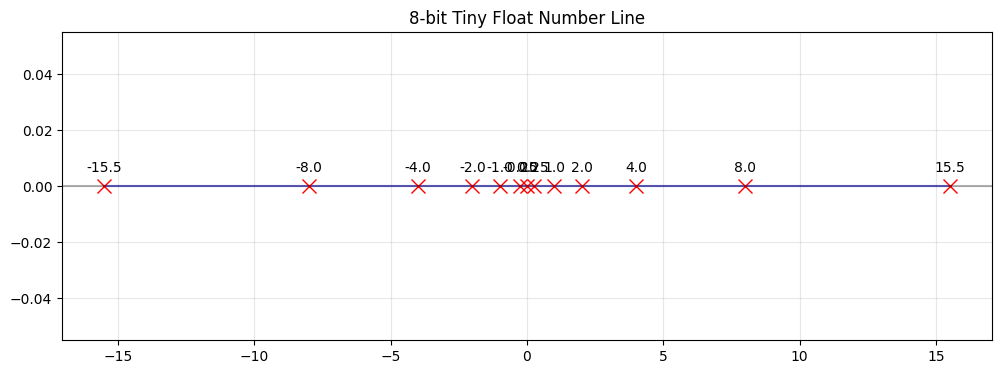

In [33]:
## Calculate max value for 8-bit tiny format
## 1 sign bit, 4 exp bits (bias 7), 3 fraction bits
max_tiny = (2 - 2**-3) * 2**(7)  # #≈ 15.5
min_tiny = -max_tiny

## Create array of "interesting" numbers
x = np.array([
    -15.5,  ## max negative tiny
    -8.0,   ## power of 2
    -4.0,   ## power of 2
    -2.0,   ## power of 2
    -1.0,   ## unit value
    -0.25,  ## small fraction
    0.0,    ## zero
    0.25,   ## small fraction
    1.0,    ## unit value
    2.0,    ## power of 2
    4.0,    ## power of 2
    8.0,    ## power of 2
    15.5    ## max positive tiny
])
y = np.zeros_like(x)

plt.figure(figsize=(12, 4))
plt.plot(x, y, '-', color='blue', alpha=0.5)
plt.plot(x, y, 'x', color='red', markersize=10)

for i, value in enumerate(x):
    plt.annotate(f'{value}', (x[i], y[i]), xytext=(0, 10), 
                textcoords='offset points', ha='center')

plt.title('8-bit Tiny Float Number Line')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

### Discussion


The number line visualization demonstrates limitations of the 8-bit tiny floating point format:

1. Range and Representation:
   - Maximum representable values are ±15.5
   - Values are symmetric around zero
   - Powers of 2 (±1, ±2, ±4, ±8) are precisely represented
   - Smaller values like ±0.25 show the format's minimal precision

2. Spacing Characteristics:
   - Numbers are not evenly distributed along the line
   - Density of representable numbers is highest near zero
   - Gaps between representable numbers grow larger as values increase
   - Each power of 2 doubles the spacing between numbers

3. Practical Implications:
   - Very limited range compared to 32-bit or 64-bit formats
   - Coarse precision, especially for larger values
   - Higher relative precision for small numbers
   - Demonstrates why this format is impractical for most real-world calculations

This visualization helps explain why the 8-bit tiny format failed in our earlier geographic calculations , its limited range and precision make it unsuitable for values requiring any significant degree of accuracy.
